In [ ]:
###Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image

In [ ]:
###Building Sequential Model
model = Sequential()

###Adding input layer
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu', input_shape = (224,224,3)))  

###Adding Hidden Layers
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())  #default pooling size is (2,2)
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())  #default pooling size is (2,2)
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D())  #default pooling size is (2,2)
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

###Adding Output Layer
model.add(Dense(1,activation = 'sigmoid'))

###Compiling the model
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
#Training from scratch
train_datagen = image.ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                         zoom_range=0.2,horizontal_flip=True)

valid_datagen = image.ImageDataGenerator(rescale=1./255) #rescale is like normalizing the data


In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Dataset/Train',
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode='binary'
                                                    )


Found 299 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = valid_datagen.flow_from_directory(
    '/content/drive/My Drive/Dataset/Val',target_size=(224,224),
    batch_size = 32,class_mode='binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
print(len(validation_generator))

2


In [ ]:
r = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=10,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

Epoch 1/10
10/10 [==============================] - 272s 27s/step - loss: 1.3896 - accuracy: 0.4682 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 85s 9s/step - loss: 0.6924 - accuracy: 0.5585 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 85s 8s/step - loss: 0.6841 - accuracy: 0.5485 - val_loss: 0.6696 - val_accuracy: 0.6833
Epoch 4/10
10/10 [==============================] - 85s 8s/step - loss: 0.6481 - accuracy: 0.5987 - val_loss: 0.5798 - val_accuracy: 0.9500
Epoch 5/10
10/10 [==============================] - 84s 8s/step - loss: 0.6072 - accuracy: 0.7224 - val_loss: 0.5963 - val_accuracy: 0.8500
Epoch 6/10
10/10 [==============================] - 83s 8s/step - loss: 0.6113 - accuracy: 0.6823 - val_loss: 0.6272 - val_accuracy: 0.9000
Epoch 7/10
10/10 [==============================] - 84s 8s/step - loss: 0.5896 - accuracy: 0.7224 - val_loss: 0.5497 - val_accuracy: 0.9500
Epoch 8/10
10/10 [

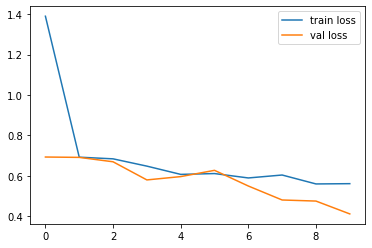

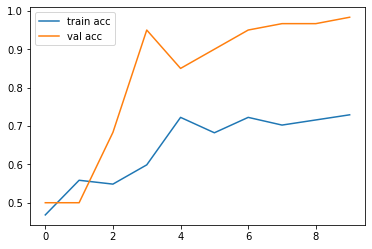

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')